<a href="https://colab.research.google.com/github/vigneshjayanth00/Football/blob/master/Shots_Analysis_by_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize 
import fns1
from tqdm import tqdm
import ast
import footyviz
from pitch1 import Pitch

In [0]:
events2=pd.read_csv(r'C:\Users\Home\Documents\StatsBomb_Sorted.csv')

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (117,124,130,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#importing libraries
import pandas as pd
import json
import glob
import numpy as np
import pandas as pd

# loop through each JSON file parse the data and save the parse data to CSV- lineups
with open(r'C:\Users\Home\Documents\Statsbomb\Statsbomb Data\PL19_20\PL19_20LineupsJSON.json', encoding='utf-8-sig') as f_input:
    lineups = pd.read_json(f_input)
# loop through each JSON file parse the data and save the parse data to CSV-matches
with open(r'C:\Users\Home\Documents\Statsbomb\Statsbomb Data\PL19_20\PL19_20matchesJSON.json', encoding='utf-8-sig') as f_input:
    matches = pd.read_json(f_input)

In [0]:


E=[]

for index, row in lineups.iterrows():
    
    a=row['lineup']
    player_info=pd.DataFrame(a)
    
player_info

,player_id,player_name,birth_date,player_gender,player_height,player_weight,jersey_number,country.id,country.name,player_nickname
0,3088,Lewis Dunk,1991-11-21,male,192.0,88.0,5,68,England,NaN
1,3097,Pascal Groß,1991-06-15,male,181.0,78.0,13,85,Germany,NaN
2,3239,Davy Pröpper,1991-09-02,male,185.0,79.0,24,160,Netherlands,NaN
3,3240,Mathew Ryan,1992-04-08,male,184.0,82.0,1,14,Australia,Mat Ryan
4,3242,Dale Stephens,1989-06-12,male,169.0,71.0,6,68,England,NaN
5,3281,Aaron Mooy,1990-09-15,male,174.0,68.0,18,14,Australia,NaN
6,3719,Gaëtan Bong Songo,1988-04-25,male,187.0,74.0,3,39,Cameroon,Gaëtan Bong
7,3864,Dan Burn,1992-05-09,male,198.0,87.0,33,68,England,NaN
8,4385,Yves Bissouma,1996-08-30,male,180.0,78.0,8,140,Mali,NaN
9,4766,Neal Maupay,1996-08-14,male,171.0,69.0,7,78,France,NaN


In [0]:
#First subset Liverpool possessions
Liv_poss=events2[events2['possession_team.name']=='Liverpool']
#Liv_poss.head(10)

In [0]:
#Get the previous event
Liv_poss['Prev_event']=Liv_poss['type.name'].shift(-1).fillna(0)
#Get the next event
Liv_poss['Next_event']=Liv_poss['type.name'].shift(1).fillna(0)
#Liv_poss.head(10)

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
cols=list(Liv_poss.filter(regex='shot|player|match|team').columns)
cols

['possession_team.id',
 'possession_team.name',
 'team.id',
 'team.name',
 'shot.end_location',
 'shot.freeze_frame',
 'match_id',
 'player.id',
 'player.name',
 'shot.statsbomb_xg',
 'shot.first_time',
 'shot.outcome.id',
 'shot.outcome.name',
 'shot.type.id',
 'shot.type.name',
 'shot.body_part.id',
 'shot.body_part.name',
 'shot.technique.id',
 'shot.technique.name',
 'pass.assisted_shot_id',
 'pass.shot_assist',
 'shot.statsbomb_xg2',
 'shot.key_pass_id',
 'shot.saved_to_post',
 'goalkeeper.shot_saved_to_post',
 'shot.aerial_won',
 'shot.open_goal',
 'shot.saved_off_target',
 'goalkeeper.shot_saved_off_target',
 'shot.one_on_one',
 'shot.deflected',
 'player_off.permanent',
 'shot.redirect',
 'shot.follows_dribble']

In [0]:
# 1)Subset Shots and 2) reduce dataframe to certain relevant columns
#Player name, type.name,shot_frame
Liv_poss1=Liv_poss[Liv_poss['type.name']=='Shot']
#Liv_poss1['type.name'].unique

In [0]:
Liv_poss2=Liv_poss1[[c for c in Liv_poss1.columns if c in cols]]
Liv_poss2.head(10)




,possession_team.id,possession_team.name,team.id,team.name,shot.end_location,shot.freeze_frame,match_id,player.id,player.name,shot.statsbomb_xg,...,goalkeeper.shot_saved_to_post,shot.aerial_won,shot.open_goal,shot.saved_off_target,goalkeeper.shot_saved_off_target,shot.one_on_one,shot.deflected,player_off.permanent,shot.redirect,shot.follows_dribble
44,24,Liverpool,24,Liverpool,"[120, 47.4, 6.2]","[{'location': [87.4, 19.1], 'teammate': True, ...",299532,3247.0,Fábio Henrique Tavares,0.0142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,24,Liverpool,24,Liverpool,"[118.9, 43.9, 1.7000000000000002]","[{'location': [118.4, 42.7], 'teammate': False...",299532,3531.0,Mohamed Salah,0.0405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,24,Liverpool,34,Burnley,"[94.3, 36.2]","[{'location': [94.2, 36.2], 'teammate': False,...",299532,5111.0,Dwight McNeil,0.0219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,24,Liverpool,24,Liverpool,"[106.8, 30.4]","[{'location': [103.7, 18.8], 'teammate': True,...",299532,3629.0,Sadio Mané,0.0326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,24,Liverpool,24,Liverpool,"[118.4, 39.5]","[{'location': [110.9, 32.4], 'teammate': True,...",299532,3535.0,Roberto Firmino Barbosa de Oliveira,0.0325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,24,Liverpool,24,Liverpool,"[118.4, 37.1, 2]","[{'location': [102, 53.9], 'teammate': True, '...",299532,3567.0,Georginio Wijnaldum,0.0419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1212,24,Liverpool,24,Liverpool,"[120, 43.1, 0.2]","[{'location': [94.9, 26.9], 'teammate': False,...",299532,3629.0,Sadio Mané,0.3590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,24,Liverpool,24,Liverpool,"[112.6, 44.7]","[{'location': [111.8, 42.2], 'teammate': True,...",299532,3535.0,Roberto Firmino Barbosa de Oliveira,0.0897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,24,Liverpool,24,Liverpool,"[113.8, 45.2]","[{'location': [116.6, 19.2], 'teammate': True,...",299532,3531.0,Mohamed Salah,0.0545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2132,24,Liverpool,24,Liverpool,"[118.4, 39.8, 0.2]","[{'location': [93.3, 53.5], 'teammate': False,...",299532,3531.0,Mohamed Salah,0.0699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Subset Shot Freeze frames
Shot_Freeze_frame=Liv_poss2[['shot.freeze_frame']]
len(Shot_Freeze_frame)

Shot_Freeze_frame.tail(10)

#Liv_poss2=Liv_poss2.drop([366639], axis=0)
Liv_poss2.tail(10)

,possession_team.id,possession_team.name,team.id,team.name,shot.end_location,shot.freeze_frame,match_id,player.id,player.name,shot.statsbomb_xg,...,goalkeeper.shot_saved_to_post,shot.aerial_won,shot.open_goal,shot.saved_off_target,goalkeeper.shot_saved_off_target,shot.one_on_one,shot.deflected,player_off.permanent,shot.redirect,shot.follows_dribble
365586,24,Liverpool,24,Liverpool,"[118.9, 39, 1.1]","[{'location': [103.4, 67.9], 'teammate': True,...",299545,3471.0,Dejan Lovren,0.0217,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365658,24,Liverpool,24,Liverpool,"[108.3, 37.8]","[{'location': [96.1, 44.6], 'teammate': True, ...",299545,3655.0,Andrew Robertson,0.0296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365757,24,Liverpool,24,Liverpool,"[120, 37, 0.4]","[{'location': [116.5, 45.4], 'teammate': False...",299545,3532.0,Jordan Brian Henderson,0.0949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365828,24,Liverpool,24,Liverpool,"[116.8, 36, 0.7000000000000001]","[{'location': [85.2, 23], 'teammate': False, '...",299545,3531.0,Mohamed Salah,0.1137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365960,24,Liverpool,24,Liverpool,"[119.6, 43.7, 0.5]","[{'location': [108.3, 59], 'teammate': True, '...",299545,3535.0,Roberto Firmino Barbosa de Oliveira,0.0629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366127,24,Liverpool,24,Liverpool,"[118.8, 40.3, 1.6]","[{'location': [110, 42], 'teammate': False, 'p...",299545,3567.0,Georginio Wijnaldum,0.1054,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366319,24,Liverpool,24,Liverpool,"[119.3, 42.9, 1.6]","[{'location': [99.1, 72.3], 'teammate': True, ...",299545,3531.0,Mohamed Salah,0.0237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366446,24,Liverpool,24,Liverpool,"[120, 45.4, 0.4]","[{'location': [101.7, 39.3], 'teammate': True,...",299545,3531.0,Mohamed Salah,0.0374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366524,24,Liverpool,24,Liverpool,"[109.8, 51.4]","[{'location': [99, 42.3], 'teammate': False, '...",299545,3535.0,Roberto Firmino Barbosa de Oliveira,0.0431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366639,24,Liverpool,24,Liverpool,"[119.9, 41.7, 0.2]",{},299545,3531.0,Mohamed Salah,0.7600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
Liv_poss2.tail(10)
Liv_poss2.index

Int64Index([    44,    161,    672,    889,    894,   1178,   1212,   2039,
              2100,   2132,
            ...
            365586, 365658, 365757, 365828, 365960, 366127, 366319, 366446,
            366524, 366639],
           dtype='int64', length=197)

In [0]:
D=[]

for index, row in Liv_poss2.iterrows():
    
    A=row['shot.freeze_frame']
    A=A.replace("'", '"')
    B=A.replace("True", 'true')
    B=B.replace("False", 'false')
    
    try:
        C=json.loads(B)
        for i in C:
            i["index"]=index
    except:
        continue
    D.extend(C)    

df1 = pd.concat([pd.DataFrame(D)])
#df1.to_csv(r'C:\Users\Home\Documents\shots_Final.csv')


,location,teammate,player.id,player.name,position.id,position.name,index
0,"[87.4, 19.1]",True,3567,Georginio Wijnaldum,15,Left Center Midfield,44
1,"[100.2, 53.1]",True,3532,Jordan Brian Henderson,13,Right Center Midfield,44
2,"[94.6, 60.4]",True,3664,Trent Alexander-Arnold,2,Right Back,44
3,"[105.2, 39.1]",True,3535,Roberto Firmino Barbosa de Oliveira,23,Center Forward,44
4,"[112.3, 38.2]",True,3629,Sadio Mané,21,Left Wing,44
...,...,...,...,...,...,...,...
2395,"[109.1, 63.1]",True,3532,Jordan Brian Henderson,13,Right Center Midfield,366524
2396,"[113.2, 59.7]",True,3531,Mohamed Salah,17,Right Wing,366524
2397,"[109.3, 40.8]",True,3629,Sadio Mané,21,Left Wing,366524
2398,"[102.3, 36]",True,3567,Georginio Wijnaldum,15,Left Center Midfield,366524


In [0]:
df1[['action_start_x','action_start_y']]=df1['location'].apply(pd.Series)
df1.columns
df1.head(10)

,location,teammate,player.id,player.name,position.id,position.name,index,action_start_x,action_start_y
0,"[87.4, 19.1]",True,3567,Georginio Wijnaldum,15,Left Center Midfield,44,87.4,19.1
1,"[100.2, 53.1]",True,3532,Jordan Brian Henderson,13,Right Center Midfield,44,100.2,53.1
2,"[94.6, 60.4]",True,3664,Trent Alexander-Arnold,2,Right Back,44,94.6,60.4
3,"[105.2, 39.1]",True,3535,Roberto Firmino Barbosa de Oliveira,23,Center Forward,44,105.2,39.1
4,"[112.3, 38.2]",True,3629,Sadio Mané,21,Left Wing,44,112.3,38.2
5,"[105.3, 19.4]",True,3655,Andrew Robertson,6,Left Back,44,105.3,19.4
6,"[105.5, 47.6]",True,3531,Mohamed Salah,17,Right Wing,44,105.5,47.6
7,"[119, 40.2]",False,3474,Nick Pope,1,Goalkeeper,44,119.0,40.2
8,"[102, 39.1]",False,3663,Ben Mee,5,Left Center Back,44,102.0,39.1
9,"[101.1, 44.4]",False,3462,Jack Cork,11,Left Defensive Midfield,44,101.1,44.4


In [0]:
Liv_shot2=pd.merge(df1,Liv_poss2[['shot.statsbomb_xg','team.name']], right_on=Liv_poss2.index,left_on='index')
Liv_shot2

,location,teammate,player.id,player.name,position.id,position.name,index,shot.statsbomb_xg,team.name
0,"[87.4, 19.1]",True,3567,Georginio Wijnaldum,15,Left Center Midfield,44,0.0142,Liverpool
1,"[100.2, 53.1]",True,3532,Jordan Brian Henderson,13,Right Center Midfield,44,0.0142,Liverpool
2,"[94.6, 60.4]",True,3664,Trent Alexander-Arnold,2,Right Back,44,0.0142,Liverpool
3,"[105.2, 39.1]",True,3535,Roberto Firmino Barbosa de Oliveira,23,Center Forward,44,0.0142,Liverpool
4,"[112.3, 38.2]",True,3629,Sadio Mané,21,Left Wing,44,0.0142,Liverpool
...,...,...,...,...,...,...,...,...,...
2395,"[109.1, 63.1]",True,3532,Jordan Brian Henderson,13,Right Center Midfield,366524,0.0431,Liverpool
2396,"[113.2, 59.7]",True,3531,Mohamed Salah,17,Right Wing,366524,0.0431,Liverpool
2397,"[109.3, 40.8]",True,3629,Sadio Mané,21,Left Wing,366524,0.0431,Liverpool
2398,"[102.3, 36]",True,3567,Georginio Wijnaldum,15,Left Center Midfield,366524,0.0431,Liverpool


In [0]:
Liv_shot3=pd.merge(Liv_shot2,player_info, left_on='player.name',right_on='player_name')

,location,teammate,player.id,player.name,position.id,position.name,index,shot.statsbomb_xg,team.name,player_id,player_name,birth_date,player_gender,player_height,player_weight,jersey_number,country.id,country.name,player_nickname


In [0]:
StatsBomb_xG=list(Liv_shot2['shot.statsbomb_xg'].unique())

,player_id,player_name,birth_date,player_gender,player_height,player_weight,jersey_number,country.id,country.name,player_nickname
0,3088,Lewis Dunk,1991-11-21,male,192.0,88.0,5,68,England,NaN
1,3097,Pascal Groß,1991-06-15,male,181.0,78.0,13,85,Germany,NaN
2,3239,Davy Pröpper,1991-09-02,male,185.0,79.0,24,160,Netherlands,NaN
3,3240,Mathew Ryan,1992-04-08,male,184.0,82.0,1,14,Australia,Mat Ryan
4,3242,Dale Stephens,1989-06-12,male,169.0,71.0,6,68,England,NaN
5,3281,Aaron Mooy,1990-09-15,male,174.0,68.0,18,14,Australia,NaN
6,3719,Gaëtan Bong Songo,1988-04-25,male,187.0,74.0,3,39,Cameroon,Gaëtan Bong
7,3864,Dan Burn,1992-05-09,male,198.0,87.0,33,68,England,NaN
8,4385,Yves Bissouma,1996-08-30,male,180.0,78.0,8,140,Mali,NaN
9,4766,Neal Maupay,1996-08-14,male,171.0,69.0,7,78,France,NaN


In [0]:
check=Liv_shot2[Liv_shot2['index']==44]
check

,location,teammate,player.id,player.name_x,position.id,position.name,index,shot.statsbomb_xg,player.name_y,team.name
0,"[87.4, 19.1]",True,3567,Georginio Wijnaldum,15,Left Center Midfield,44,0.0142,Fábio Henrique Tavares,Liverpool
1,"[100.2, 53.1]",True,3532,Jordan Brian Henderson,13,Right Center Midfield,44,0.0142,Fábio Henrique Tavares,Liverpool
2,"[94.6, 60.4]",True,3664,Trent Alexander-Arnold,2,Right Back,44,0.0142,Fábio Henrique Tavares,Liverpool
3,"[105.2, 39.1]",True,3535,Roberto Firmino Barbosa de Oliveira,23,Center Forward,44,0.0142,Fábio Henrique Tavares,Liverpool
4,"[112.3, 38.2]",True,3629,Sadio Mané,21,Left Wing,44,0.0142,Fábio Henrique Tavares,Liverpool
5,"[105.3, 19.4]",True,3655,Andrew Robertson,6,Left Back,44,0.0142,Fábio Henrique Tavares,Liverpool
6,"[105.5, 47.6]",True,3531,Mohamed Salah,17,Right Wing,44,0.0142,Fábio Henrique Tavares,Liverpool
7,"[119, 40.2]",False,3474,Nick Pope,1,Goalkeeper,44,0.0142,Fábio Henrique Tavares,Liverpool
8,"[102, 39.1]",False,3663,Ben Mee,5,Left Center Back,44,0.0142,Fábio Henrique Tavares,Liverpool
9,"[101.1, 44.4]",False,3462,Jack Cork,11,Left Defensive Midfield,44,0.0142,Fábio Henrique Tavares,Liverpool


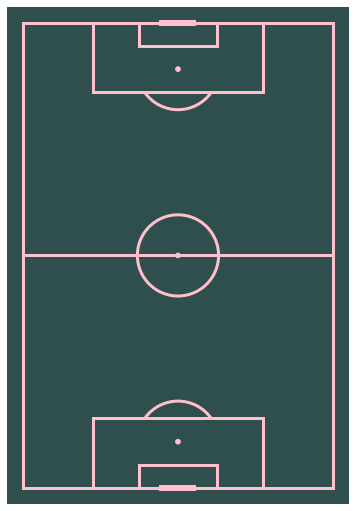

In [0]:
# print(o_fra)

    Statsbomb_seg = Liv_shot2[Liv_shot2.StatsBomb_xG == frame_select].reset_index(drop=True)

    team_1_seg = track_seg[(track_seg['team'] == FCN_team)]
    team_0_seg = track_seg[(track_seg['team'] != FCN_team) & (track_seg['team'] != 10)]

    ball_seg = track_seg[track_seg['team'] == 10].reset_index(drop=True)

    pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='full',layout=(1,1),figsize=(10.8, 7.2),
        pitch_width=68,pitch_length=105,stripe_color='darkslategrey',pitch_color='darkslategrey',line_color='pink',linewidth=3,stripe=True,goal_type='line',axis=False,label=True)
    fig, ax = pitch.draw()
    plt.show()


    